In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [159]:
df = pd.read_csv('SuviEatingChart.csv')
#df_eating = df_eating.fillna(0).set_index('date')
date = df.pop('date')
df_eating = pd.DataFrame({})
df_eating['date'] = date
df_eating['Quantity (oz.)'] = df.fillna(0).transpose().cumsum().tail(1).transpose()['qty.9']
#df.fillna(0).cumsum().transpose().head(1)
#df_eating.reset_index(drop = True, inplace = True)
#df_eating.transpose().cumsum().tail(1)

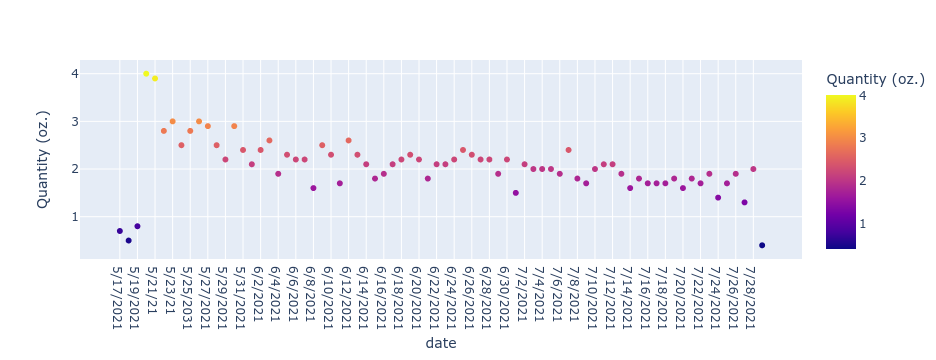

In [4]:
px.scatter(df_eating, x = 'date', y='Quantity (oz.)', color='Quantity (oz.)')

In [1]:
rx = pd.read_csv('MedicationRegimen.csv')
rx.head()

NameError: name 'pd' is not defined

In [161]:
df_all = df_eating.merge(rx, left_on=['date'], right_on=['date'])
day_number = np.arange(len(df_all))
df_all['day since vet visit'] = day_number
#df_all.columns

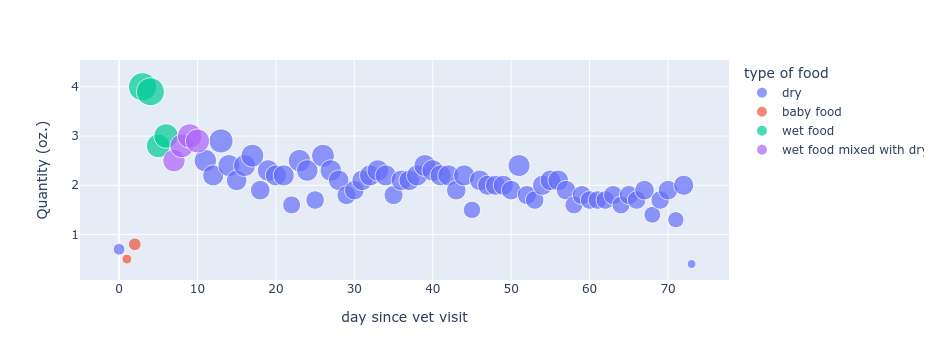

In [162]:
df_all['date'] = pd.to_datetime(df_all['date'])
px.scatter(df_all, x = 'day since vet visit', y='Quantity (oz.)', size='Quantity (oz.)', color = 'type of food', 
           hover_data = ['rx'])


<AxesSubplot:xlabel='day since vet visit', ylabel='Quantity (oz.)'>

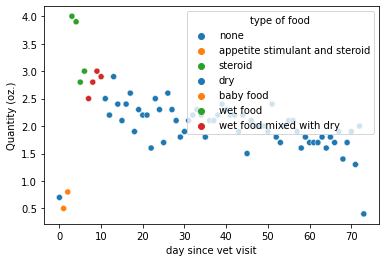

In [71]:
sns.scatterplot(data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'rx', sizes=600)
sns.scatterplot(data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'type of food', sizes=600)

<AxesSubplot:xlabel='day since vet visit', ylabel='Quantity (oz.)'>

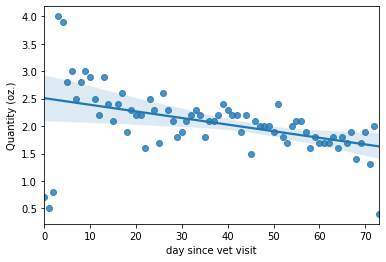

In [72]:
sns.regplot(data=df_all, y="Quantity (oz.)", x="day since vet visit")

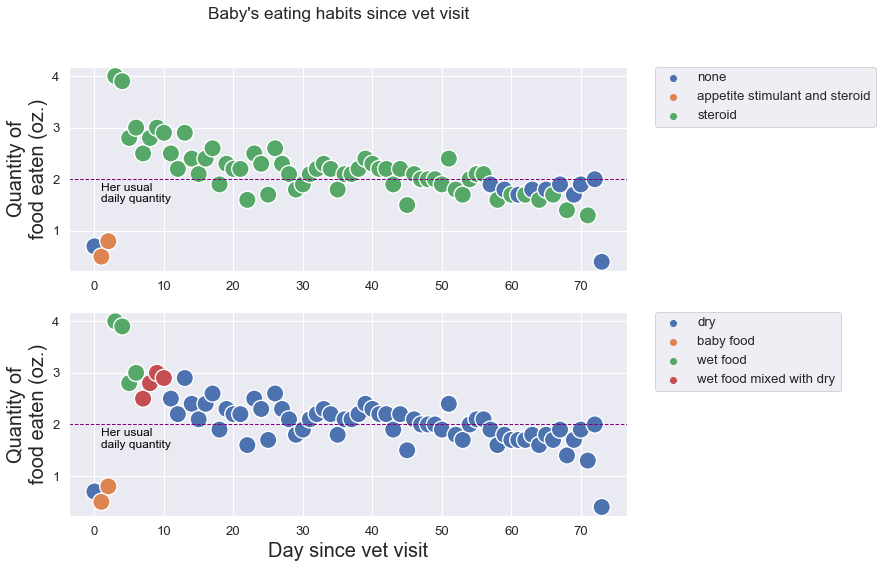

In [164]:
sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2,1, sharey=True)
fig.suptitle('Baby\'s eating habits since vet visit')
sns.scatterplot(ax = axes[0], data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'rx', s=300)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].axhline(2, color='purple', linewidth = 1, linestyle='--')
axes[0].text(1, 1.55, "Her usual\ndaily quantity", horizontalalignment='left', size='small', color='black')
axes[0].set_xlabel(' ', fontsize=20)
axes[0].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
#axes[0].legend(loc='lower right')
sns.scatterplot(ax = axes[1], data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'type of food',
               s=300)
#plt.legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].axhline(2, color='purple', linewidth = 1, linestyle='--')
axes[1].text(1, 1.55, "Her usual\ndaily quantity", horizontalalignment='left', size='small', color='black')
axes[1].set_xlabel('Day since vet visit', fontsize=20)
axes[1].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
fig.set_size_inches(10, 8.27)

plt.savefig('./baby.png')